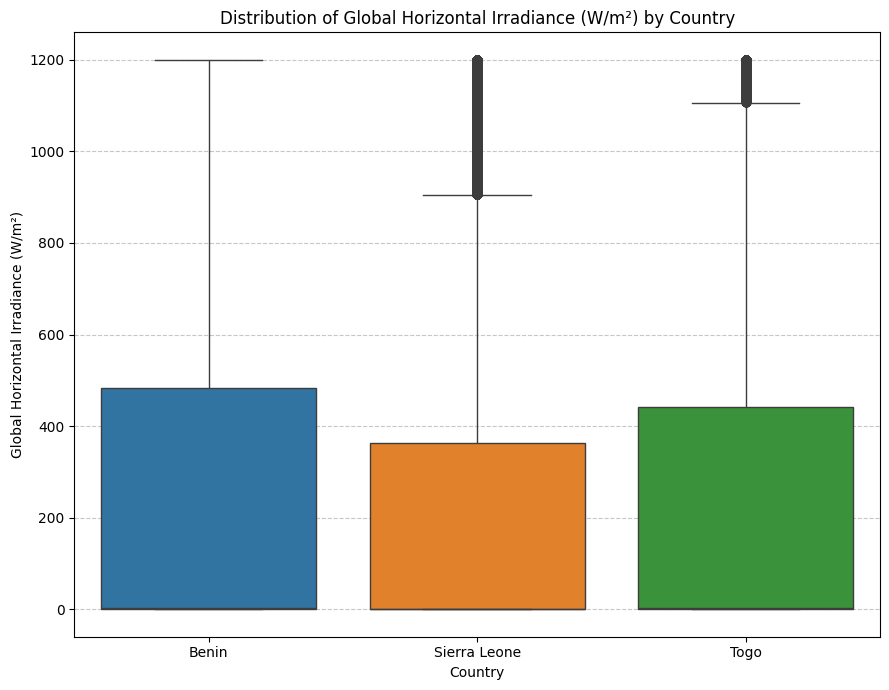

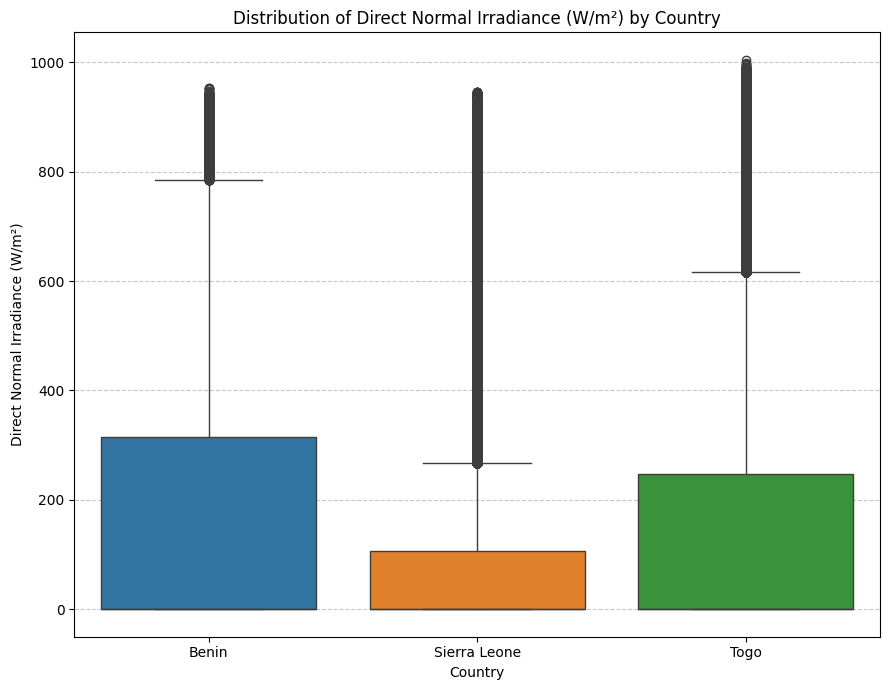

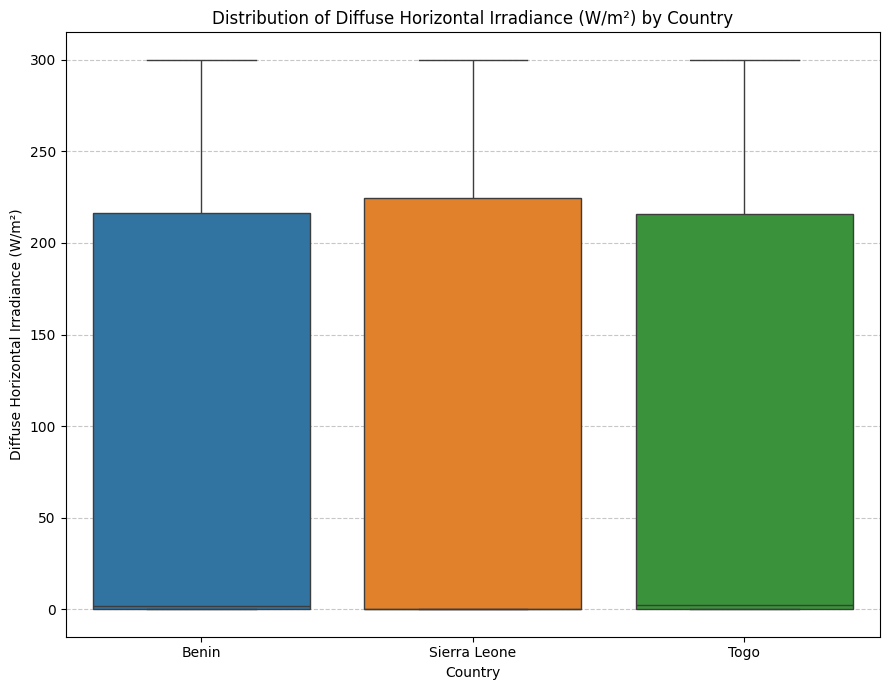

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# File paths for cleaned data
file_paths = {
    'Benin': '../../data/benin_clean.csv',
    'Sierra Leone': '../../data/sierraleone_clean.csv',
    'Togo': '../../data/togo_clean.csv'
}

all_countries_df = pd.DataFrame()

# Load and combine data
for country, path in file_paths.items():
    if not os.path.exists(path):
        continue
    try:
        df_country = pd.read_csv(path, parse_dates=['Timestamp'])
        df_country['Country'] = country
        all_countries_df = pd.concat([all_countries_df, df_country], ignore_index=True)
    except Exception:
        pass

if all_countries_df.empty:
    print("Error: No data loaded. Cannot generate plots.")
else:
    metrics = [
        ('GHI', 'Global Horizontal Irradiance (W/m²)'),
        ('DNI', 'Direct Normal Irradiance (W/m²)'),
        ('DHI', 'Diffuse Horizontal Irradiance (W/m²)')
    ]
    colors = {'Benin': 'tab:blue', 'Sierra Leone': 'tab:orange', 'Togo': 'tab:green'} 

    # Generate boxplots for each metric
    for metric, label in metrics:
        if metric not in all_countries_df.columns:
            continue

        df_plot = all_countries_df.dropna(subset=[metric]).copy()
        if df_plot.empty:
            continue

        plt.figure(figsize=(9, 7))
        sns.boxplot(data=df_plot, x='Country', y=metric, hue='Country', palette=colors, legend=False)
        plt.title(f'Distribution of {label} by Country')
        plt.xlabel('Country')
        plt.ylabel(label)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

In [11]:
import pandas as pd

print("\n--- Summary Table: Mean, Median, and Standard Deviation Across Countries ---")

# Define the metrics we want to summarize
metrics_for_summary = ['GHI', 'DNI', 'DHI']

# Group the DataFrame by 'Country' and apply the aggregation functions
summary_table = all_countries_df.groupby('Country')[metrics_for_summary].agg(['mean', 'median', 'std'])

# Display the summary table
print(summary_table)

print("\nSummary table generation complete.")


--- Summary Table: Mean, Median, and Standard Deviation Across Countries ---
                     GHI                            DNI                     \
                    mean median         std        mean median         std   
Country                                                                      
Benin         241.942230    1.8  330.051321  167.441866    0.0  261.547532   
Sierra Leone  204.331652    0.3  296.521193  116.523731    0.0  218.573992   
Togo          231.690804    2.1  321.603729  151.258469    0.0  250.956962   

                    DHI                     
                   mean median         std  
Country                                     
Benin         99.078733    1.6  120.710214  
Sierra Leone  99.073369    0.0  122.921594  
Togo          98.853736    2.5  120.945963  

Summary table generation complete.


In [ ]:
# Benin has the highest average GHI (241.94 W/m²) 
# Sierra Leone shows the lowest median GHI
# DHI is highly consistent across countries

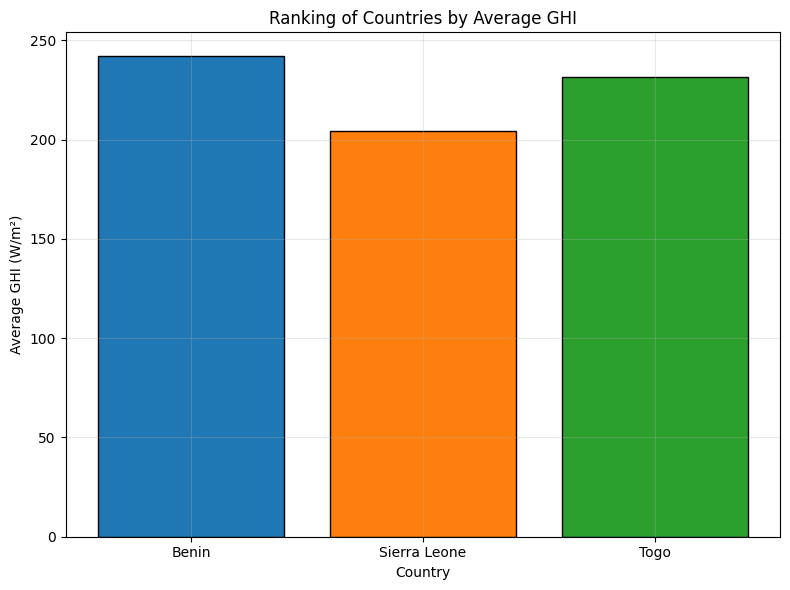

In [ ]:
import matplotlib.pyplot as plt

# Data from summary table
countries = ['Benin', 'Sierra Leone', 'Togo']
mean_ghi = [241.942230, 204.331652, 231.690804]
colors = ['tab:blue', 'tab:orange', 'tab:green']

# Create bar chart
plt.figure(figsize=(8, 6))
plt.bar(countries, mean_ghi, color=colors, edgecolor='black')
plt.xlabel('Country')
plt.ylabel('Average GHI (W/m²)')
plt.title('Ranking of Countries by Average GHI')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()